In [1]:
import json

with open('../data/issuedata.json') as f:
    issuestr = json.load(f)
    issuedic = json.loads(issuestr)
    issuedata = issuedic['issuedata']

In [2]:
data=[]
for i in range(len(issuedata)):
    data.append(issuedata[i][1])
# print(len(data))

from getFirstIssue import get_first_issue
LTC_1st_issues, OTC_1st_issues = get_first_issue(data)

2771
3809
3809
2771
3809


In [3]:
import pandas as pd
LTC_issue_num = len(LTC_1st_issues)
OTC_issue_num = len(OTC_1st_issues)

LTC_df = pd.DataFrame(LTC_1st_issues)
OTC_df = pd.DataFrame(OTC_1st_issues)
# print(LTC_df)

In [4]:
def replace_with_l(lst):
    for i in range(len(lst)):
        lst[i] = len(lst[i])
    return lst
    

# print(LTC_df['usedt'].tolist())
usedt1 = LTC_df['usedt'].tolist()
usedt2 = OTC_df['usedt'].tolist()

title1 = LTC_df['title'].tolist()
title1 = replace_with_l(title1)
# print(title1)
title2 = OTC_df['title'].tolist()
title2 = replace_with_l(title2)

body1 = LTC_df['body'].tolist()
body1 = replace_with_l(body1)
body2 = OTC_df['body'].tolist()
body2 = replace_with_l(body2)

label_num1 = LTC_df['labels'].tolist()
label_num2 = OTC_df['labels'].tolist()

fromcmt1 = LTC_df['fromcmt'].tolist()
fromcmt2 = OTC_df['fromcmt'].tolist()

clscmt1 = LTC_df['clscmt'].tolist()
clscmt2 = OTC_df['clscmt'].tolist()

In [5]:
import numpy as np
tmp1 = np.array(label_num1)
# print(tmp1.sum(axis=1).tolist())
import numpy as np
tmp2 = np.array(label_num2)
# print(tmp2.sum(axis=1).tolist())

In [6]:
import scipy.stats as stats
print(stats.mannwhitneyu(usedt1,usedt2,alternative='two-sided'))
print(stats.mannwhitneyu(title1,title2,alternative='two-sided'))
print(stats.mannwhitneyu(body1,body2,alternative='two-sided'))
print(stats.mannwhitneyu(tmp1.sum(axis=1).tolist(),tmp2.sum(axis=1).tolist(),alternative='two-sided'))
print(stats.mannwhitneyu(fromcmt1,fromcmt2,alternative='two-sided'))
print(stats.mannwhitneyu(clscmt1,clscmt2,alternative='two-sided'))

MannwhitneyuResult(statistic=5267324.5, pvalue=0.8949661821645596)
MannwhitneyuResult(statistic=5022495.0, pvalue=0.0008068783635837666)
MannwhitneyuResult(statistic=4633746.5, pvalue=2.6817605466741862e-17)
MannwhitneyuResult(statistic=4997933.0, pvalue=0.00019751941028415423)
MannwhitneyuResult(statistic=5720089.5, pvalue=3.406935007649773e-22)
MannwhitneyuResult(statistic=6792529.0, pvalue=3.6654750975070424e-99)


In [7]:
# 所有repo中语言的比例
LTC_type = {}
OTC_type = {}
for index, row in LTC_df.iterrows():
    if row['language'] not in LTC_type.keys():
        LTC_type[row['language']] = 1
    else:
        LTC_type[row['language']] += 1
print(LTC_type)
for index, row in OTC_df.iterrows():
    if row['language'] not in OTC_type.keys():
        OTC_type[row['language']] = 1
    else:
        OTC_type[row['language']] += 1
print(OTC_type)

{'JavaScript': 660, 'C++': 180, 'C#': 313, 'PHP': 237, 'Java': 179, 'Python': 825, 'C': 41, 'HTML': 54, 'TypeScript': 229, None: 53}
{'JavaScript': 986, 'C++': 194, 'C#': 284, 'PHP': 277, 'Java': 220, 'Python': 1240, 'C': 47, 'HTML': 67, 'TypeScript': 440, None: 54}


[('the', 3.23), ('to', 1.88), ('in', 1.51), ('none', 1.14), ('is', 1.11), ('of', 0.9), ('and', 0.88), ('this', 0.85), ('pandas', 0.81), ('it', 0.69), ('at', 0.68), ('com', 0.68), ('not', 0.67), ('for', 0.64), ('https', 0.64), ('with', 0.55), ('be', 0.54), ('that', 0.53), ('if', 0.5), ('on', 0.48), ('as', 0.45), ('python', 0.44), ('py', 0.38), ('line', 0.36), ('file', 0.36), ('you', 0.34), ('source', 0.33), ('an', 0.33), ('github', 0.33), ('or', 0.32), ('from', 0.32), ('js', 0.32), ('should', 0.32), ('version', 0.32), ('code', 0.29), ('java', 0.29), ('test', 0.28), ('are', 0.28), ('error', 0.28), ('issue', 0.27), ('pd', 0.27), ('we', 0.26), ('lib', 0.26), ('but', 0.25), ('have', 0.25), ('node', 0.25), ('when', 0.24), ('core', 0.24), ('doc', 0.24), ('all', 0.23), ('index', 0.23), ('after', 0.23), ('rst', 0.23), ('df', 0.22), ('can', 0.21), ('name', 0.21), ('no', 0.2), ('system', 0.2), ('use', 0.2), ('org', 0.2), ('type', 0.2), ('**', 0.2), ('user', 0.2), ('self', 0.2), ('will', 0.19), ('

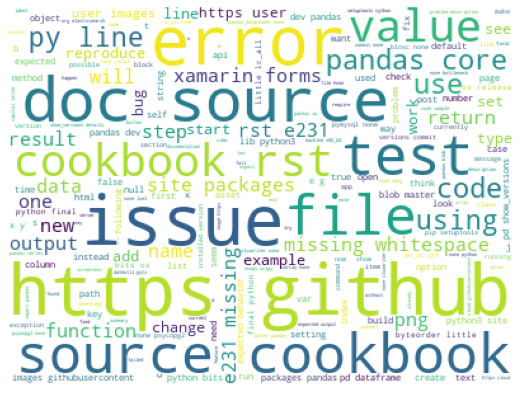

------------------
[('the', 3.28), ('to', 2.0), ('in', 1.36), ('is', 1.13), ('none', 1.09), ('of', 0.94), ('this', 0.93), ('and', 0.9), ('https', 0.74), ('not', 0.69), ('it', 0.69), ('com', 0.65), ('for', 0.64), ('pandas', 0.61), ('be', 0.59), ('that', 0.52), ('if', 0.51), ('with', 0.51), ('as', 0.49), ('on', 0.46), ('at', 0.46), ('python', 0.46), ('github', 0.4), ('you', 0.4), ('version', 0.4), ('file', 0.39), ('from', 0.36), ('or', 0.35), ('issue', 0.35), ('code', 0.35), ('py', 0.35), ('js', 0.34), ('are', 0.32), ('test', 0.32), ('an', 0.31), ('lib', 0.31), ('should', 0.3), ('line', 0.29), ('have', 0.27), ('when', 0.27), ('**', 0.27), ('node', 0.27), ('pd', 0.27), ('vscode', 0.26), ('but', 0.25), ('\\x', 0.25), ('src', 0.24), ('error', 0.24), ('user', 0.23), ('by', 0.22), ('can', 0.22), ('index', 0.22), ('name', 0.22), ('use', 0.21), ('all', 0.21), ('we', 0.21), ('core', 0.2), ('new', 0.2), ('versions', 0.2), ('bug', 0.2), ('df', 0.2), ('installed', 0.2), ('please', 0.2), ('no', 0.19

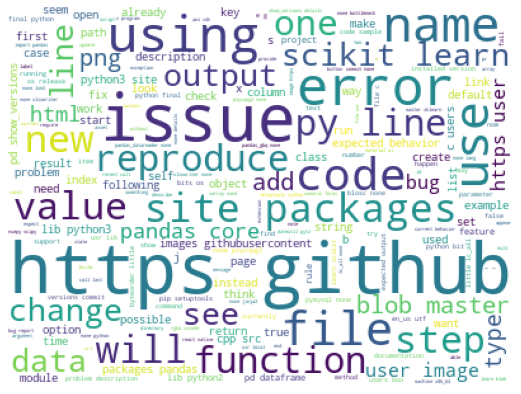

In [8]:
# 词频统计，但是这里的content没有去掉url等等信息，不是pure content
from getWordFreq import get_word_freq

body_content1 = LTC_df['body'].tolist()
s = ""
for item in body_content1:
    s += str(item)
get_word_freq(s)

print("------------------")

body_content2 = OTC_df['body'].tolist()
s = ""
for item in body_content2:
    s += str(item) 
get_word_freq(s)